## Load and prepare the data


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('gdrive/MyDrive/Datasets/reviews.csv', encoding="ISO-8859-1")
df.head()

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


Find out how many rows the dataset contains and confirm that there are no missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


Check for duplicate rows in the dataset.

In [ ]:
df.groupby('Sentiment').describe()

Text                                                               
           count unique                                                top freq
Sentiment                                                                      
0          25000  24697  I see that C. Thomas Howell has appeared in ma...    3
1          25000  24884  Loved today's show!!! It was a variety and not...    5

The dataset contains a few hundred duplicate rows. Let's remove them and check for balance.

In [ ]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                                               
           count unique                                                top freq
Sentiment                                                                      
0          24697  24697  Bill Rebane's "The Capture of Bigfoot" is one ...    1
1          24884  24884  First of all, let me comment that the audience...    1

Use [CountVectorizer] to vectorize the text in the DataFrame's "Text" column using a built-in dictionary of stop words. Set `min_df` to 20 to ignore words that appear less than 20 times in the corpus of training text. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [ ]:
text = vectorizer.transform(['The long l3ines   and; pOOr customer# service really turned me off...123.'])
text = vectorizer.inverse_transform(text)
print(text)

[array(['customer', 'long', 'poor', 'really', 'service', 'turned'],
      dtype='<U25')]


Split the dataset for training and testing. We'll do a 50/50 split since the dataset contains nearly 50,000 samples.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)  

## Train a logistic-regression model

The next step is to train a classifier. We'll use scikit-learn's [LogisticRegression].

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

Validate the trained model with the 50% of the dataset aside for testing and show a confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


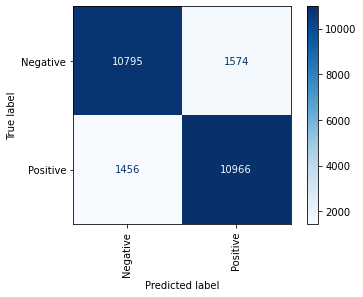

In [ ]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

The model correctly identified 10,795 negative reviews while misclassifying 1,574 of them. It correctly identified 10,966 positive reviews and got it wrong 1,456 times. Use the `score` method to get a rough measure of the model's accuracy.

In [ ]:
model.score(x_test, y_test)

0.8777782259691017

Now retrieve the Receiver Operating Characteristic (ROC) metric for a better measure of accuracy.

In [ ]:
from sklearn.metrics import roc_auc_score

probabilities = model.predict_proba(x_test)
roc_auc_score(y_test, probabilities[:, 1])

0.9451468130493158

## Use the model to analyze text

Let's score a review by vectorizing the text of that review and passing it to the model's `predict_proba` method. Are the results consistent with what you would expect?

In [ ]:
review = 'The long lines and poor customer service really turned me off.'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.09183399572004458

Now score a more positive review and see if the model agrees that the sentiment is positive.

In [ ]:
review = 'One of the more delightful experiences I have had!'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.69549636070553